#**CS 133 Term Project**



**Project Deliverables**

1. Each project team will choose one of the following data sets for their project. Create a Google Colab notebook to perform the data analysis and visualization for this project. Create and answer at least 5 unique questions using different types of plots to help you understand the data. One of the plots must be a map visualization. Besides the map, one of the plots must be an interactive plot. You can create additional categorical columns or reshape your data to help you understand the data.

2. Each data set has a prediction goal. Create a test set and a training set using the original data set.

3. Follow the steps that we use in Lecture and Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classification or regression models that can perform the prediction as indicated in the data set description. Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each model.

4. Use the appropriate metrics to evaluate the models' performance. Select the best one for fine-tuning.

5. Test your best and fine-tuned ML model using the test set.

6. Create a Google slideshow presentation (5-10 min long) in which your group with explain the following:

   - How the data visualization help you with choosing certain strategies in developing the ML training pipeline
   - What strategy is used to create test/train data
   - What ML models are chosen, and why are they suitable for this analysis
the performance of all trained models (including the performance metrics)
   - Show the prediction performance of the best ML model using the test set.
   - To wrap up, discuss the challenges you have encountered and/or any other thoughts you have about this project.

7. Submit the urls for the Colab notebook and the Google slides in Canvas.



---

#**Data Set:**

#**SF Bay Area House Prices**

<img src="https://www.worldpropertyjournal.com/news-assets/San-Francisco-homes-california-keyimage.jpg" width=600>  
<font size=2 color=gray>Image Credit: World Property Journal</font>  


Bay Area real estate prices have been rapidly appreciating since 2012. Over the last decade, median property values have more than doubled, and some areas of the Bay Area have more than tripled!

The rapidly escalating prices are great for those that have already bought into the market. For potential homebuyers, these escalating prices result in getting less home for your dollar (and/or having to increase your budget), and gives pause as to not wanting to buy at the peak of the market.

Here is a data set of over 7,000 active listings from June 2019 containing factors influencing home prices across the region, including number of bedrooms and bathrooms, home size, lot size, school quality, and commute times.

Here are the descriptions of the data:

- `Address` - the adddress of the house
- `City` - the city the house is at
- `State` - California, this data set is from the Bay Area
- `Zip` - postal zip code
- `Price` - listing price of the house
- `Beds` - number of bedrooms
- `Baths` - number of bathrooms
- `Home size` - the square footage of the house
- `Lot size` - the square footage of the lot
- `Latitude` - latitude coordinate
- `Longitude` - longitude coodinate
- `SF time` - the commute time by car at 8 AM to San Francisco
- `PA time` - the commute time by car at 8 AM to commute to Palo Alto
- `School score` - the quality of the schools in the neighborhood
- `Commute time` - the commute time by car at 8 AM to the general Bay Area.

Data Source Credit: Michael Boles

###**Prediction**

You are tasked to build a ML model to predict the price of the homes in the SF Bay Area.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
data='https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv'
df = pd.read_csv(data)
df

,Address,City,State,Zip,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,2412 Palmer Ave,Belmont,CA,94002,1459000,3,2.0,1360.0,5001.0,37.516781,-122.304623,63,33,77.9,33
1,1909 Hillman Ave,Belmont,CA,94002,1595000,4,2.0,2220.0,3999.0,37.521972,-122.294079,63,33,77.9,33
2,641 Waltermire St,Belmont,CA,94002,899999,2,1.0,840.0,4234.0,37.520233,-122.273144,63,33,77.9,33
3,2706 Sequoia Way,Belmont,CA,94002,1588000,3,2.0,1860.0,5210.0,37.520192,-122.309437,63,33,77.9,33
4,1568 Winding Way,Belmont,CA,94002,1999000,4,3.5,2900.0,16117.2,37.524280,-122.291241,63,33,77.9,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140,The Davis,Mountain House,CA,95391,603990,5,3.0,2327.0,NaN,37.756444,-121.547719,120,125,65.3,120
7141,The Berkeley,Mountain House,CA,95391,619990,5,4.0,2410.0,NaN,37.756444,-121.547719,120,125,65.3,120
7142,Geranium,Mountain House,CA,95391,666340,5,4.0,2486.0,NaN,37.764721,-121.537761,120,125,65.3,120
7143,The Pepperdine,Mountain House,CA,95391,659990,5,4.0,2856.0,NaN,37.756444,-121.547719,120,125,65.3,120


In [ ]:
df.info()
# from this, we can see that there are 7145 rows
# 8 null values for Address
# 82 null values for Home size
# 265 null values for Lot size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Address       7137 non-null   object 
 1   City          7145 non-null   object 
 2   State         7145 non-null   object 
 3   Zip           7145 non-null   int64  
 4   Price         7145 non-null   int64  
 5   Beds          7145 non-null   int64  
 6   Baths         7145 non-null   float64
 7   Home size     7063 non-null   float64
 8   Lot size      6880 non-null   float64
 9   Latitude      7145 non-null   float64
 10  Longitude     7145 non-null   float64
 11  SF time       7145 non-null   int64  
 12  PA time       7145 non-null   int64  
 13  School score  7085 non-null   float64
 14  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 837.4+ KB


---

##**Questions / Visualizations:**

###Q1: How is a house's coordinates related to its price?

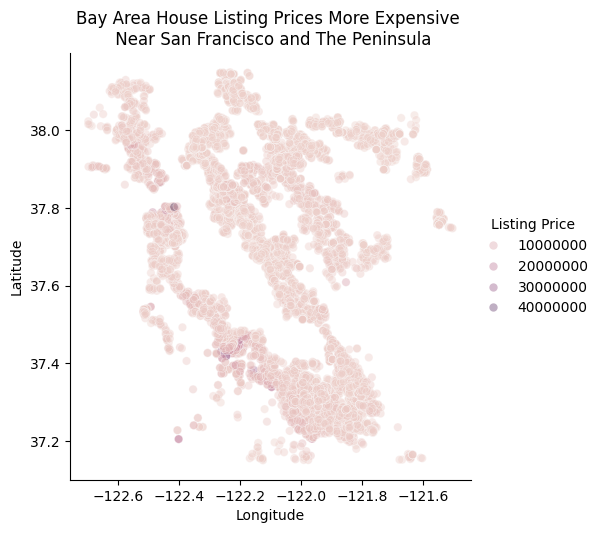

In [ ]:
# drop houses that have a null latitude, longitude, or price
#technically not needed, since there are no null lat, long, or price
lat_long_price_clean = df.dropna(subset = ['Latitude', 'Longitude', 'Price'])

#rename Price to Listing Price to make it more clear
lat_long_price_clean = lat_long_price_clean.rename(columns={"Price":"Listing Price"})

#relational plot where longitude is the x axis, latitude is the y axis, and price is the hue
q1_a = sns.relplot(data=lat_long_price_clean,
                   x="Longitude",
                   y="Latitude",
                   hue="Listing Price",
                   alpha=0.4);

#title
plt.title("Bay Area House Listing Prices More Expensive \n Near San Francisco and The Peninsula");

#the graph looks like a map of the Bay Area
#based on this, we can see that there are the price is mostly around 10000000
#there seems to be a really dark spot around long = -122.4, lat = 37.8
#and some dark spots around long = -122.2, lat = 37.4
#which are around San Francisco / the Peninsula, respectively
#but a lot of dots overlap. Would like to see the more expensive areas more clearly,
#in case some dark dots are being covered by light dots

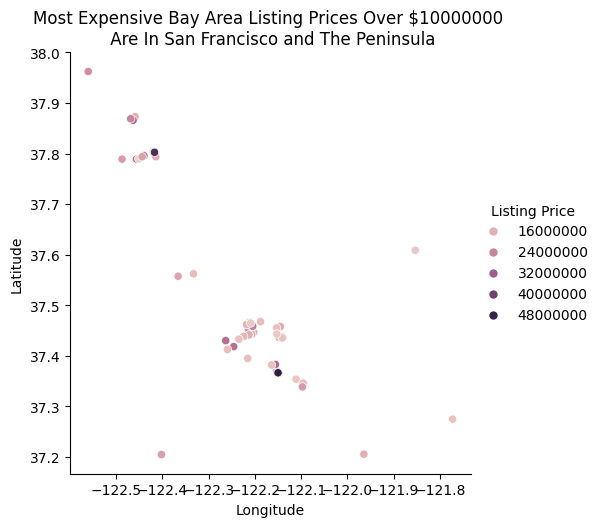

In [ ]:
#so, we limit the data to dots whose listing price is over 10000000

#relational plot where longitude is the x axis, latitude is the y axis, and price is the hue
q1_b = sns.relplot(data=lat_long_price_clean[lat_long_price_clean["Listing Price"] > 10000000],
                   x="Longitude",
                   y="Latitude",
                   hue="Listing Price");

#title
plt.title("Most Expensive Bay Area Listing Prices Over $10000000 \n Are In San Francisco and The Peninsula");

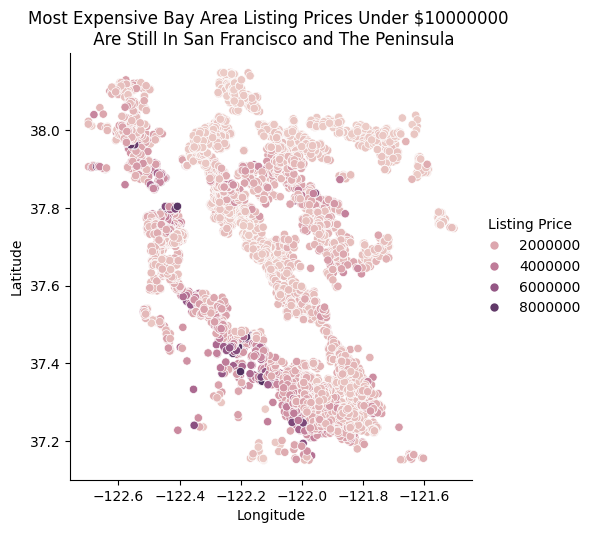

In [ ]:
#but there are so few dots that are above 10000000
#maybe it would be good to only plot those under 10000000 too

#relational plot where longitude is the x axis, latitude is the y axis, and price is the hue
q1_c = sns.relplot(data=lat_long_price_clean[lat_long_price_clean["Listing Price"] < 10000000],
                   x="Longitude",
                   y="Latitude",
                   hue="Listing Price");

#title
plt.title("Most Expensive Bay Area Listing Prices Under $10000000 \n Are Still In San Francisco and The Peninsula");

#this looks a bit better.
#Now we can really see that San Francisco and The Peninsula have the most expensive houses, even after removing outliers.
plt.savefig('q1.png', bbox_inches = "tight")

###Q2: What is the average price of houses and average school quality in different cities? (Interactive Plot)


In [ ]:
#required libraries and methods for plotly
#configure_plotly_brower_state() code taken from ____

import warnings; warnings.filterwarnings("ignore")


# plotly library
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# If running plotly in Google colab, you will need to run this custom initalization function
# in each offline plotting cell
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
# Need to run configure_plotly_browser_state() if you are in Google colab
configure_plotly_browser_state()

# drop houses that have null cities, school score, or price
#technically not needed, since there are no null cities nor prices
city_school_price_clean = df.dropna(subset = ['City', 'School score', 'Price', 'Home size'])

#rename 'Price' to 'Listing Price' to make it more clear
city_school_price_clean = city_school_price_clean.rename(columns={"Price":"Listing Price",
                                                                  "School score":"School Quality Score",
                                                                  "Home size":"Home Size"})

#group by city, get the average price for each city
avg_price_by_city = city_school_price_clean.groupby('City')['Listing Price'].mean()

#group by city, get the average school quality for each city
avg_school_score_by_city = city_school_price_clean.groupby('City')['School Quality Score'].mean()

#group by city, get the average home size for each city
avg_home_size_by_city = city_school_price_clean.groupby('City')['Home Size'].mean()

#concat the two average Series into one Dataframe indexed by city
averaged_by_city = pd.concat([avg_price_by_city, avg_school_score_by_city, avg_home_size_by_city], axis=1)

#rename 'Price' to 'Listing Price' to make it more clear
averaged_by_city = averaged_by_city.rename(columns={"Listing Price":"Average Listing Price",
                                                    "School Quality Score":"Average School Quality Score",
                                                    "Home Size":"Average Home Size (Square Feet)"})

averaged_by_city_default_index = averaged_by_city.reset_index()
px.scatter(averaged_by_city_default_index, x="Average Listing Price", y="Average School Quality Score", hover_data="City", color="Average Home Size (Square Feet)", title="Average Listing Price, Average School Quality Score, Average Home Size Are Positively Correlated For Bay Area Houses")

###Q3: What is the relationship between zipcodes and price?

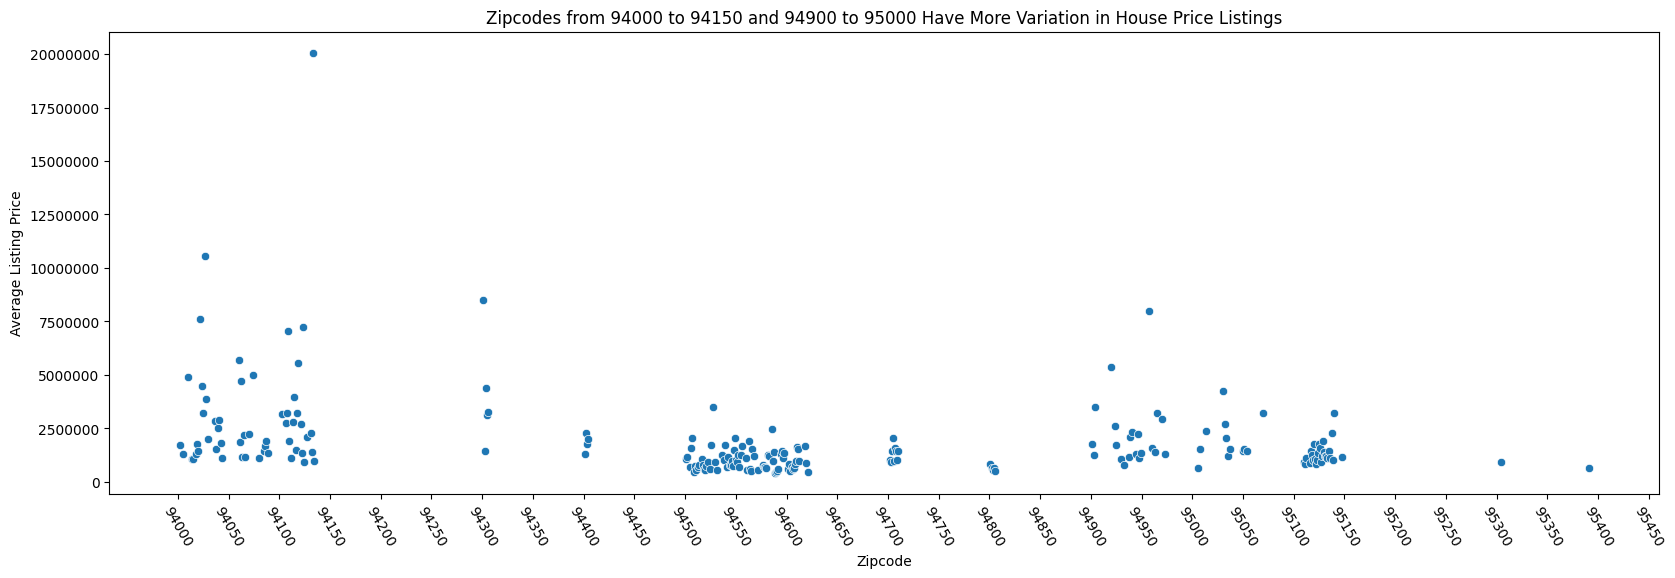

In [ ]:
# drop houses that have null zipcodes or price
# technically not needed, since there are no null zipcodes or price
zip_price_clean = df.dropna(subset = ['Zip', 'Price'])

#rename 'Price' to 'Listing Price' and 'Zip' to 'Zipcode' to make it more clear
zip_price_clean = zip_price_clean.rename(columns={"Price":"Listing Price",
                                                  "Zip":"Zipcode"})

#group by zipcode and get the average listing price of each zipcode
avg_price_by_zip = zip_price_clean.groupby('Zipcode')['Listing Price'].mean()

#find out how many unique zipcodes there are(?)
avg_price_by_zip_df = avg_price_by_zip.to_frame()

#rename the "Listing Price" to "Average Listing Price"
avg_price_by_zip_df = avg_price_by_zip_df.rename(columns={"Listing Price":"Average Listing Price"})

#widen the graph to make it more clear
plt.figure(figsize=(20, 6))

#graph using scatterplot, zipcodes are x axis, average price is the y axis
q3_a = sns.scatterplot(data=avg_price_by_zip_df,
                       x="Zipcode",
                       y="Average Listing Price")
q3_a.set(xticks=np.arange(94000,95500,50))
q3_a.set_xticklabels(np.arange(94000,95500,50), rotation=300)
plt.ticklabel_format(style='plain', axis='y')

#title
plt.title("Zipcodes from 94000 to 94150 and 94900 to 95000 Have More Variation in House Price Listings");

#maybe there are a lot of rich neighborhoods really close to poorer neighborhoods in the zipcodes with more variation in average listing prices?
#this means if we're trying to predict price...
#...it would be harder to assume the price based on the nearby zipcodes for 94000 to 94150 because they have more variation?
#but for example, zipcodes around 95100 to 95150, they probably have around the same listings?

#seems like the point at (94200, 20000000) may be an outlier.

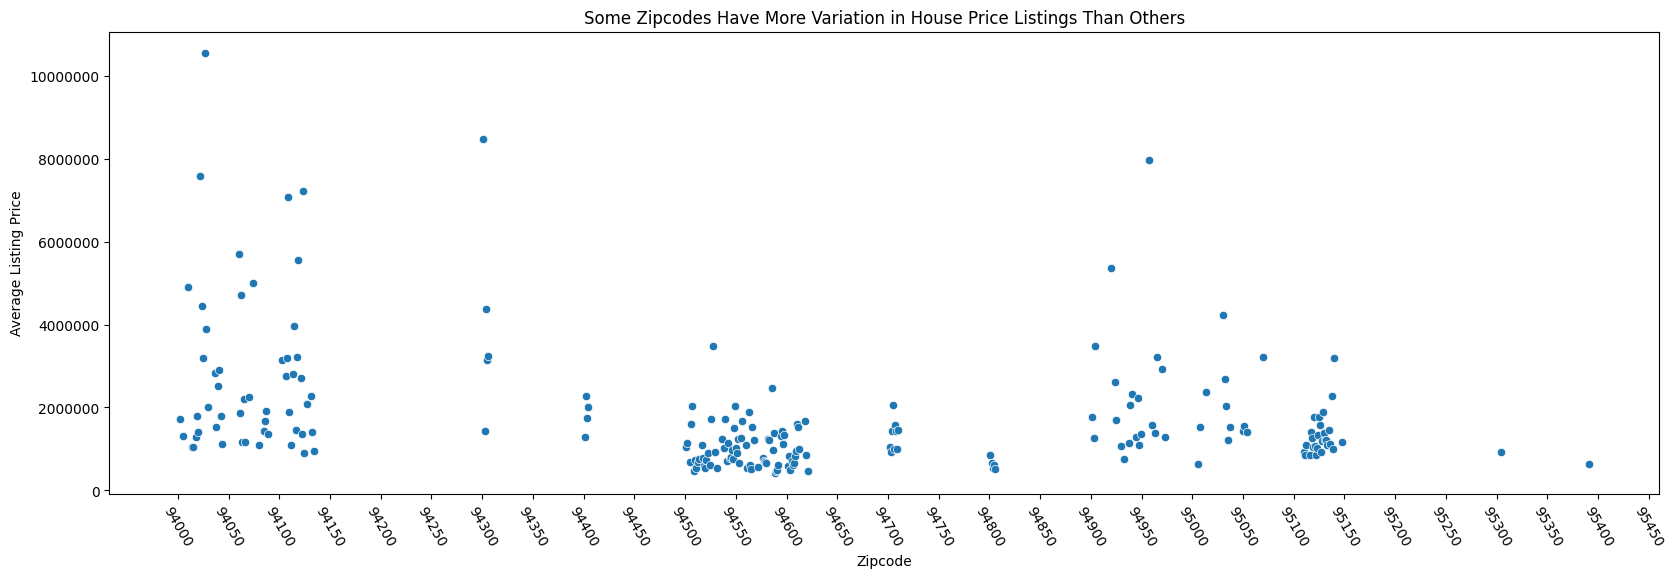

In [ ]:
#let's try removing the outlier (point at (94200, 20000000)) and see what the graph looks like now

#widen the graph to make it more clear
plt.figure(figsize=(20, 6))

#graph using scatterplot, zipcodes are x axis, average price is the y axis
q3_b = sns.scatterplot(data=avg_price_by_zip_df[avg_price_by_zip_df["Average Listing Price"] < 12500000],
                       x="Zipcode",
                       y="Average Listing Price")

q3_b.set(xticks=np.arange(94000,95500,50))
q3_b.set_xticklabels(np.arange(94000,95500,50), rotation=300)
plt.ticklabel_format(style='plain', axis='y')

#title
plt.title("Some Zipcodes Have More Variation in House Price Listings Than Others");
plt.savefig('q3.png', bbox_inches = "tight")

###Q4: How do lot size and home size relate to the house price? Do bigger lot sizes and home sizes correspond to more expensive houses?

Text(0.5, 1.0, 'Bay Area Listing Price Increases As Home Size Increases')

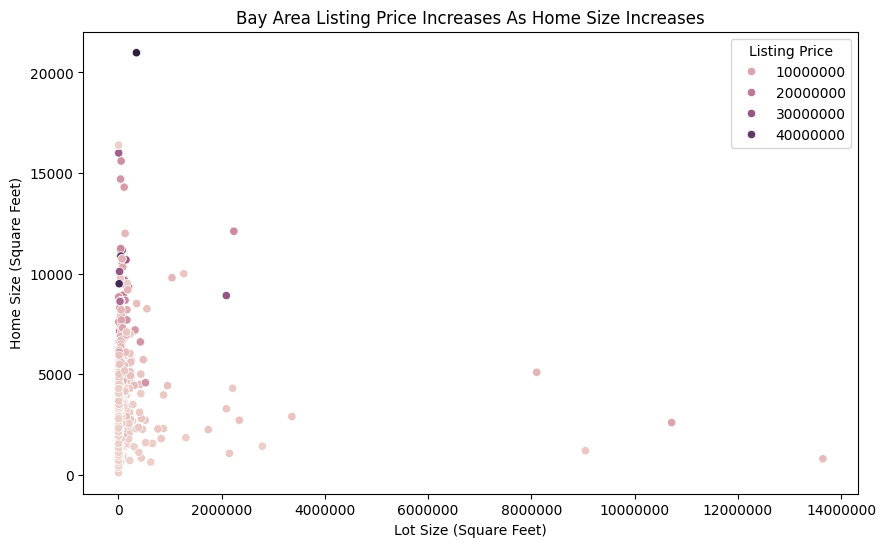

In [ ]:
# drop houses that have null lot size, home size, or price
# needed, since there are null lot sizes and home sizes
lot_home_price_clean = df.dropna(subset = ['Lot size', 'Home size', 'Price'])

#rename 'Price' to 'Listing Price', 'Lot size' to 'Lot Size', and 'Home size' to 'Home Size' to make it more clear
lot_home_price_clean = lot_home_price_clean.rename(columns={"Price":"Listing Price",
                                                  "Lot size":"Lot Size (Square Feet)",
                                                  "Home size":"Home Size (Square Feet)"})

plt.figure(figsize=(10, 6))

#graph using scatterplot, lot size as x axis, latitude as y axis, price as color
#if lot size and home size aren't that correlated, maybe create graphs for them separately to see which has more of a correlation with price, if any
q4_a = sns.scatterplot(data=lot_home_price_clean,
                       x="Lot Size (Square Feet)",
                       y="Home Size (Square Feet)",
                       hue="Listing Price")

plt.ticklabel_format(style='plain', axis='x')

#seems like the biggest lots have some of the smallest home sizes and some of the cheapest listings
#bigger lot size seems to correlate to smaller home size
#but the bigger the home size, the higher the listing

plt.title("Bay Area Listing Price Increases As Home Size Increases")

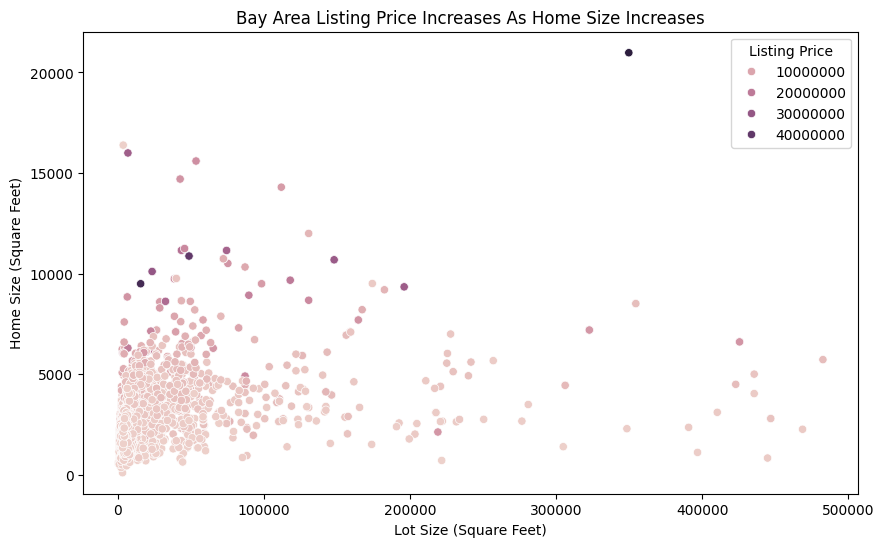

In [ ]:
#lets remove the outliers

plt.figure(figsize=(10, 6))

#graph using scatterplot, lot size as x axis, latitude as y axis, price as color
#if lot size and home size aren't that correlated, maybe create graphs for them separately to see which has more of a correlation with price, if any
q4_b = sns.scatterplot(data=lot_home_price_clean[lot_home_price_clean["Lot Size (Square Feet)"] < 500000],
                       x="Lot Size (Square Feet)",
                       y="Home Size (Square Feet)",
                       hue="Listing Price")

plt.ticklabel_format(style='plain', axis='x')

#seems the general trend is that lot sizes don't really correlate with home size nor price much...
#regardless of lot size, the listing price is going to be on the lower end
#on the other hand, home size does seem to correlate more with listing price
#homes that are over 5000 and especially around 10000 (unit) seem to be more expensive

plt.title("Bay Area Listing Price Increases As Home Size Increases")
plt.savefig('q4.png', bbox_inches = "tight")

###Q5: Does having more rooms (bedrooms, bathrooms) increase house price?

<Figure size 1000x600 with 0 Axes>

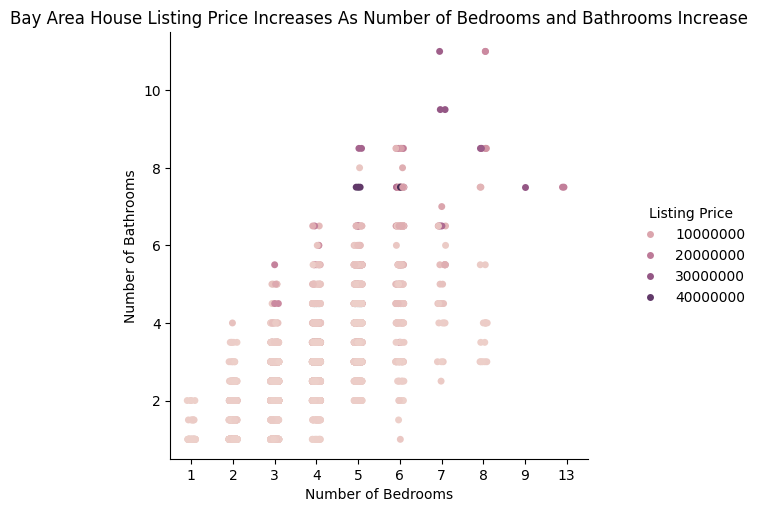

In [ ]:
# drop houses that have null bedrooms, bathrooms, or price
# not needed, since there are no null bedrooms, bathrooms, or prices
lot_home_price_clean = df.dropna(subset = ['Beds', 'Baths', 'Price'])

#rename 'Price' to 'Listing Price', 'Beds' to 'Number of Bedrooms', and 'Baths' to 'Number of Bathrooms' to make it more clear
lot_home_price_clean = lot_home_price_clean.rename(columns={"Price":"Listing Price",
                                                  "Beds":"Number of Bedrooms",
                                                  "Baths":"Number of Bathrooms"})

plt.figure(figsize=(10, 6))

#graph using scatterplot, lot size as x axis, latitude as y axis, price as color
#if lot size and home size aren't that correlated, maybe create graphs for them separately to see which has more of a correlation with price, if any
q5_a = sns.catplot(data=lot_home_price_clean,
                       x="Number of Bedrooms",
                       y="Number of Bathrooms",
                       hue="Listing Price",
                       )

plt.title("Bay Area House Listing Price Increases As Number of Bedrooms and Bathrooms Increase")
plt.savefig('q5.png', bbox_inches = "tight")

###Q6: What are the 10 most expensive cities to live in?

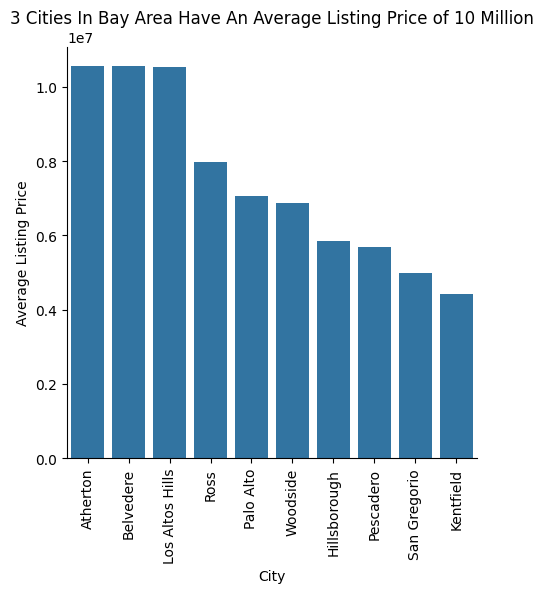

In [ ]:
#group by city
#get the average listing price
#sort in descending order and get only the top 10 into a new dataframe using head
#graph the new dataframe using a bar plot

# drop houses that have null price
# not needed, since there are no null prices
price_clean = df.dropna(subset = ['Price'])

#rename 'Price' to 'Listing Price' to make it more clear
price_clean = price_clean.rename(columns={"Price":"Listing Price"})

#group by city and get the average
avg_price_clean = price_clean.groupby('City')['Listing Price'].mean()

ten_most_expensive_cities = avg_price_clean.sort_values(ascending=False).head(10)

#graph using barplot
q6 = sns.catplot(data=ten_most_expensive_cities,
                 kind="bar",
                )
q6.set_ylabels(label="Average Listing Price")
q6.set_xticklabels(rotation=450);
plt.title("3 Cities In Bay Area Have An Average Listing Price of 10 Million")
plt.savefig('q6.png', bbox_inches = "tight")

####Based on the visualizations, it appears that the price increases when home size, school score, number of bedrooms, and number of bathrooms increases. Maybe we can use that in the model. Let's try to see where the outliers are for these attributes so we can start to remove them.

##**Preparing Data For ML:**

###Drop null values:

In [ ]:
#clean the dataset to remove null values from the columns we want to use in the model
#remove the null values from Price, Home size, School score, Beds, Baths
cleaned_df = df.dropna(subset = ['School score', 'Price', 'Home size', 'Beds', 'Baths'])

###Visualize 'Home size' as boxplot and remove outliers:

Anything over 4503.75 is an outlier.


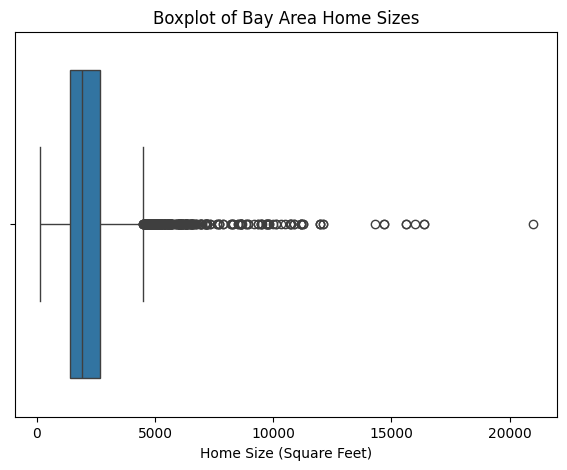

In [ ]:
#cleaned_df is the dataset without nulls for the price, school score, and home size columns

#box plot for home size
plt.figure(figsize=(7, 5))
home_size_box_plot = sns.boxplot(x=cleaned_df["Home size"])
plt.title("Boxplot of Bay Area Home Sizes");
plt.xlabel("Home Size (Square Feet)")
plt.savefig('box_home.png', bbox_inches = "tight")

#from this graph, it looks like anything above 5000 is an outlier, but i want to find the actual max value of the boxplot
#also there are no outliers on the lower half of the graph, so only need to find the upper outlier limit

#interquartile range
home_third_quartile = cleaned_df["Home size"].quantile(0.75)
home_first_quartile = cleaned_df["Home size"].quantile(0.25)
home_interquartile_range = home_third_quartile - home_first_quartile

#upper limit for outliers
home_upper_limit = home_third_quartile + (1.5 * home_interquartile_range)
print("Anything over",home_upper_limit,"is an outlier.")

###Visualize 'School score' as boxplot and remove outliers

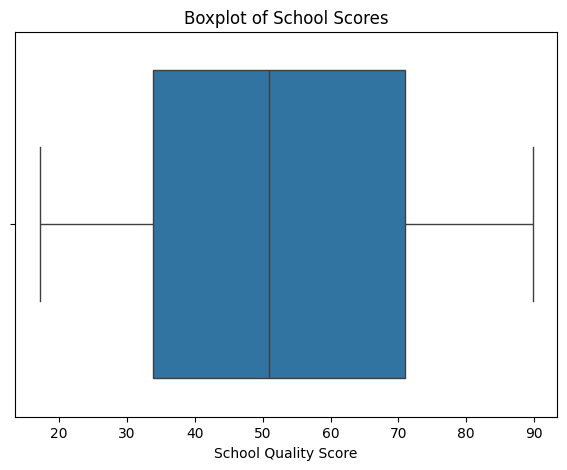

In [ ]:
#box plot for school score
plt.figure(figsize=(7, 5))
school_size_box_plot = sns.boxplot(x=cleaned_df["School score"])
plt.title("Boxplot of School Scores");
plt.xlabel("School Quality Score")
plt.savefig('box_school.png', bbox_inches = "tight")

#there are no outliers for school score, so no need to remove outliers

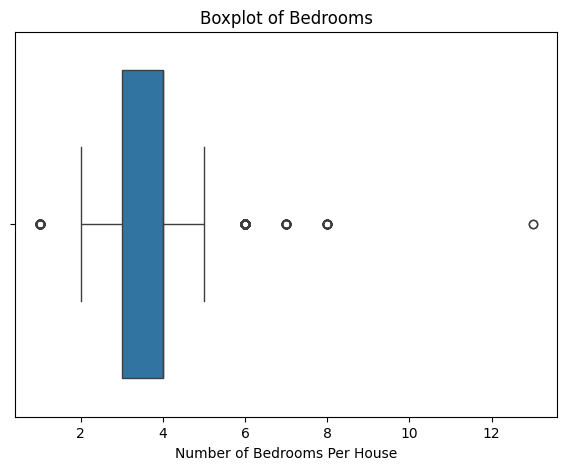

In [ ]:
#box plot for Beds
plt.figure(figsize=(7, 5))
school_size_box_plot = sns.boxplot(x=cleaned_df["Beds"])
plt.title("Boxplot of Bedrooms");
plt.xlabel("Number of Bedrooms Per House")
plt.savefig('box_bed.png', bbox_inches = "tight")

#seems like anything under 2 and above 5 is an outlier

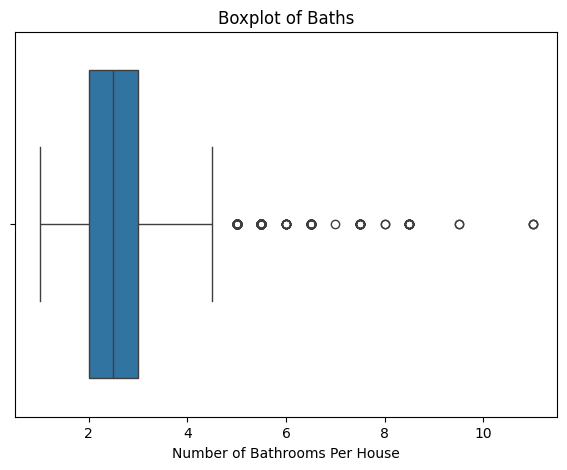

In [ ]:
#box plot for baths
plt.figure(figsize=(7, 5))
school_size_box_plot = sns.boxplot(x=cleaned_df["Baths"])
plt.title("Boxplot of Baths");
plt.xlabel("Number of Bathrooms Per House")
plt.savefig('box_bath.png', bbox_inches = "tight")

#seems like anything above ~4.4 is an outlier

###The Prepared Data For The ML Models:

In [ ]:
#remove outliers from dataset based on what we see from the graphs
no_outlier_cleaned_df = cleaned_df[(cleaned_df["Home size"] <= 4503.75) & (cleaned_df["Beds"] >= 2) & (cleaned_df["Beds"]<=5) & (cleaned_df["Baths"]<=4.4)]

##**Using Three Machine Learning Models And Choosing The Best One:**

###Split Dataset Into Training and Testing

In [ ]:
#ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# The variables we want to use to predict 'Price' are 'Home size', 'School score', 'Beds', 'Baths'
# since they seem to be positively correlated with price
influencing_vars = no_outlier_cleaned_df[['Home size', 'School score', "Beds", "Baths"]]

# The variable we want to predict is 'Price'
target_var = no_outlier_cleaned_df['Price']

# results in four lists:
#the list of influencing values for the training dataset,
#the list of influencing values for the testing dataset,
#the list of target values for the training dataset,
#the list of target values for the testing dataset
#the test_size=0.2 means that the test dataset will be 20% of the no_outliers_cleaned_df dataset
influencing_train, influencing_test, target_train, target_test = train_test_split(influencing_vars, target_var, test_size=0.2, random_state=123)

###ML Model 1: Linear Regression

In [ ]:
#create the linear regression model
lin_reg_model = LinearRegression()

#use the cross_val_score method to get seven mean square error scores
#we use ‘neg_mean_squared_error’, which means the higher the score the better
#for example, if the MSE was 3, then the negative MSE is -3
#and if another MSE is 5, then the negative MSE is -5
#using the original MSE, 3 is better than 5 since the lower the better
#using the negative MSE, -3 is better than -5, since the higher the better
#we use the training influencing vars and training target values to get the scores
lin_reg_mse_cross_val_scores = cross_val_score(lin_reg_model, influencing_train, target_train, cv=7, scoring='neg_mean_squared_error')

#print the values from mean_squared_error and cross_val_score
print("The Cross Validation Scores for Mean Squared Error for Linear Regression are:\n",lin_reg_mse_cross_val_scores)
print("The Average Cross Validation Score for Mean Squared Error for Linear Regression is:",lin_reg_mse_cross_val_scores.mean())

The Cross Validation Scores for Mean Squared Error for Linear Regression are:
 [-5.51714173e+11 -7.09608971e+11 -8.03281009e+11 -4.88320956e+11
 -9.07720868e+11 -4.50231442e+11 -3.62407081e+11]
The Average Cross Validation Score for Mean Squared Error for Linear Regression is: -610469214259.3729


###ML Model 2: Random Forest

In [ ]:
#create the random forest regression model
ran_for_model = RandomForestRegressor(random_state=123)

#use the cross_val_score method to get seven mean square error scores
ran_for_mse_cross_val_scores = cross_val_score(ran_for_model, influencing_train, target_train, cv=7, scoring='neg_mean_squared_error')

#print the values from mean_squared_error and cross_val_score
print("The Cross Validation Scores for Mean Squared Error for Random Forest Regression are:\n",ran_for_mse_cross_val_scores)
print("The Average Cross Validation Score for Mean Squared Error for Random Forest Regression is:",ran_for_mse_cross_val_scores.mean())

The Cross Validation Scores for Mean Squared Error for Random Forest Regression are:
 [-3.61014664e+11 -4.08881507e+11 -2.65584029e+11 -2.08203740e+11
 -3.79941745e+11 -1.52289277e+11 -2.03543329e+11]
The Average Cross Validation Score for Mean Squared Error for Random Forest Regression is: -282779755705.6136


###ML Model 3: Decision Trees

In [ ]:
#create the decision tree regression model
dec_tree_model = DecisionTreeRegressor(random_state=123)

#use the cross_val_score method to get seven mean square error scores
dec_tree_mse_cross_val_scores = cross_val_score(dec_tree_model, influencing_train, target_train, cv=7, scoring='neg_mean_squared_error')

#print the values from mean_squared_error and cross_val_score
print("The Cross Validation Scores for Mean Squared Error for Decision Tree Regression are:\n",dec_tree_mse_cross_val_scores)
print("The Average Cross Validation Score for Mean Squared Error for Decision Tree Regression is:",dec_tree_mse_cross_val_scores.mean())

The Cross Validation Scores for Mean Squared Error for Decision Tree Regression are:
 [-7.75505599e+11 -7.04026031e+11 -3.78308424e+11 -6.16014559e+11
 -3.88924450e+11 -3.72126527e+11 -2.95942325e+11]
The Average Cross Validation Score for Mean Squared Error for Decision Tree Regression is: -504406845010.9193


###Visualization of Best ML Model:

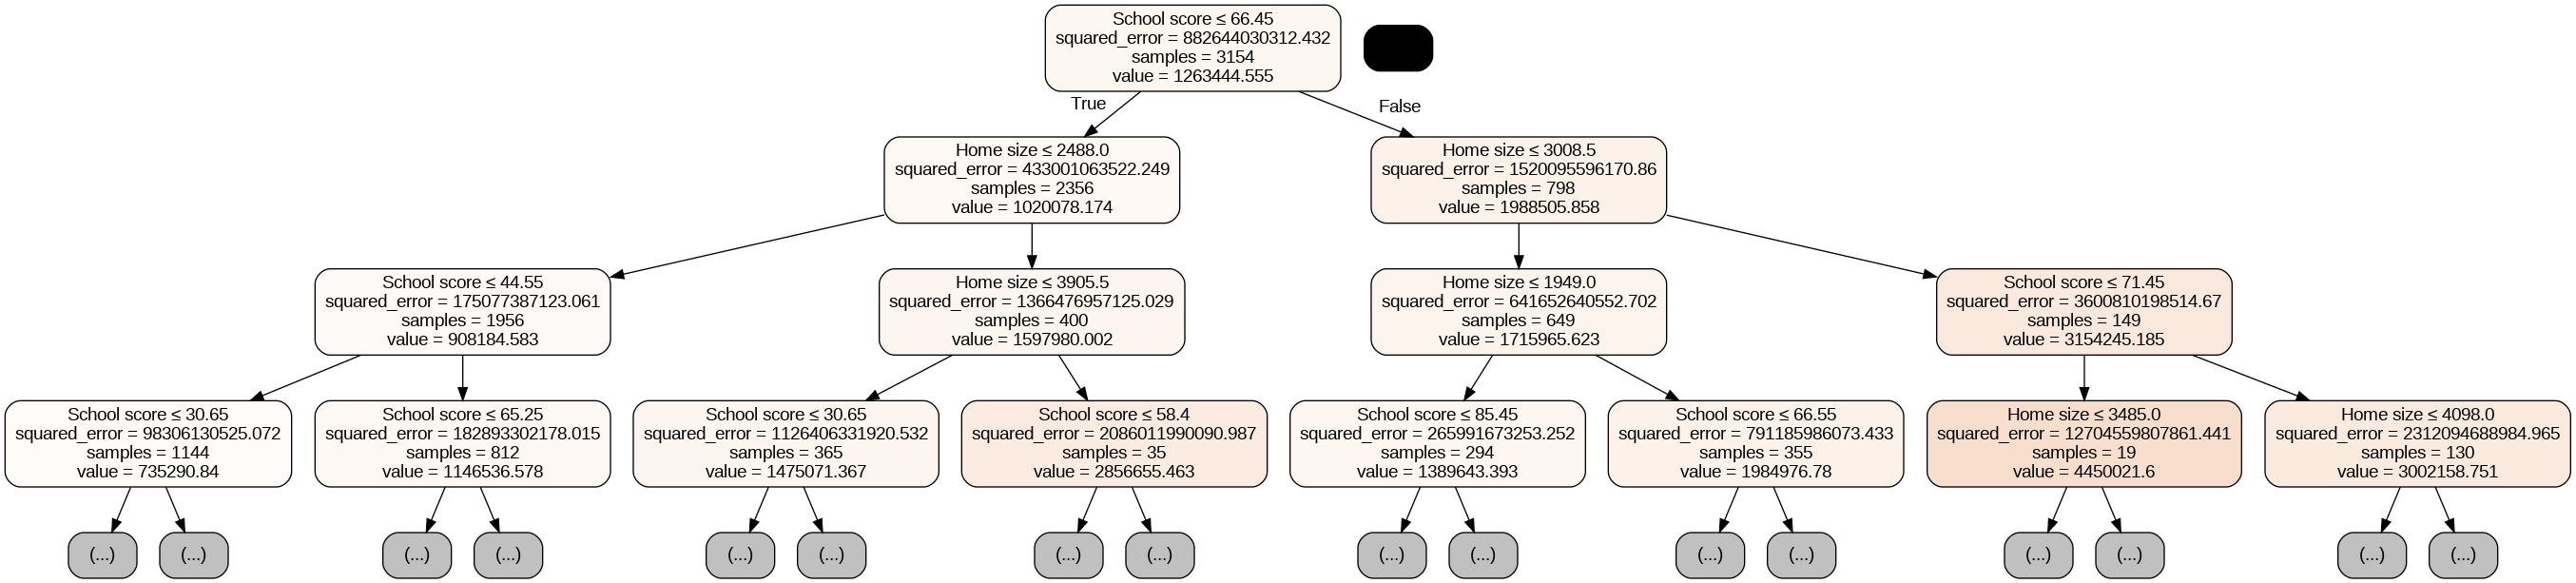

In [ ]:
#visualization of the first tree in the random forest

#Professor said she would help with this

#in order to visualize the model, it has to be fitted first
ran_for_model.fit(influencing_train, target_train)

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
#chose index 99 because that is the last decision tree in the random forest
#max depth of 3 so we can easily see part of the last decision tree in the forest
export_graphviz(ran_for_model.estimators_[99], out_file=dot_data, max_depth=3,
                filled=True, rounded=True,
                special_characters=True, feature_names=['Home size', 'School score', "Beds", "Baths"])

# Create graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('rf_first_tree.png')

# Display the image
Image(filename='rf_first_tree.png')


##**Refine The Best Machine Learning Model:**

####Refine the best model using hyperparameters:

In [ ]:
#random forests was the best model

#create random forests model with hyperparameters
refined_ran_for_model = RandomForestRegressor(n_estimators=1000, random_state=123)

#use the cross_val_score method to get seven mean square error scores of the refined model
refined_ran_for_mse_cross_val_scores = cross_val_score(refined_ran_for_model, influencing_train, target_train, cv=7, scoring='neg_mean_squared_error')

#print the values from mean_squared_error and cross_val_score
print("(Refined) The Cross Validation Scores for Mean Squared Error for Random Forest Regression are:\n",refined_ran_for_mse_cross_val_scores)
print("(Refined) The Average Cross Validation Score for Mean Squared Error for Random Forest Regression is:",refined_ran_for_mse_cross_val_scores.mean())


(Refined) The Cross Validation Scores for Mean Squared Error for Random Forest Regression are:
 [-3.44720357e+11 -4.12880593e+11 -2.58059880e+11 -2.07597085e+11
 -3.88819504e+11 -1.49108848e+11 -2.07336419e+11]
(Refined) The Average Cross Validation Score for Mean Squared Error for Random Forest Regression is: -281217526678.1075


##**Test the refined ML Model using testing data:**

###Testing Refined ML Model:

In [ ]:
refined_ran_for_model.fit(influencing_train, target_train)
predictions = refined_ran_for_model.predict(influencing_test)
mse = mean_squared_error(target_test, predictions)
print("Testing Data MSE:",mse)

Testing Data MSE: 178182015031.42554


###Visualize Refined ML Model:

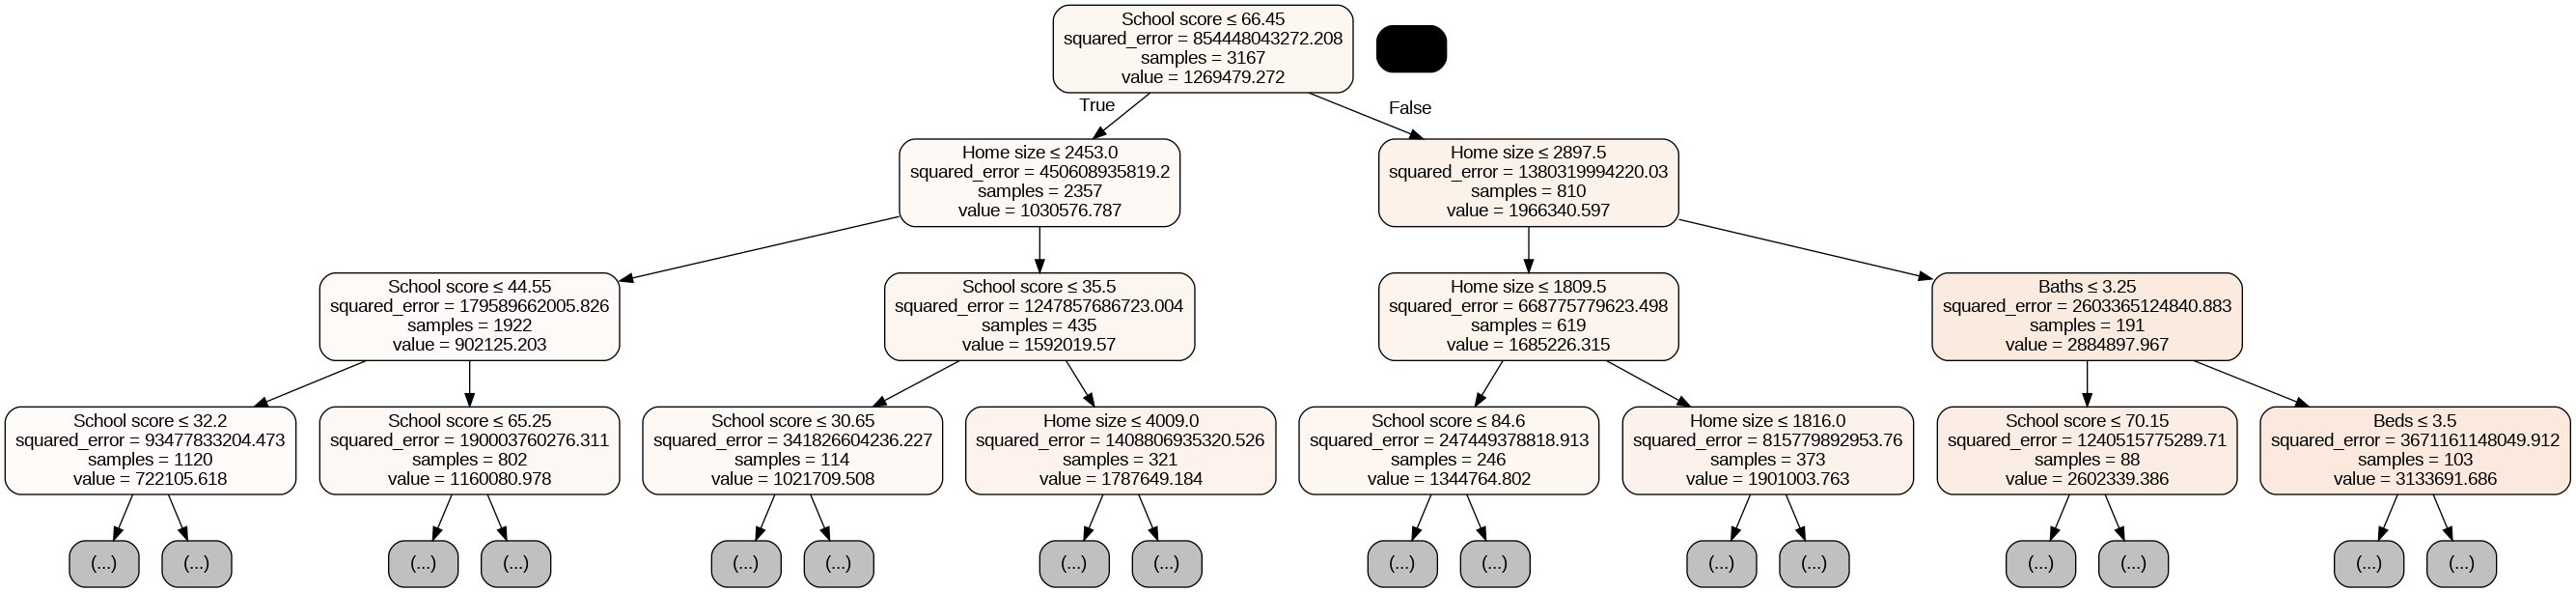

In [ ]:
#visualization to show the improved model

#Professor said she would help with this

from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()
#chose index 999 because that is the last decision tree in the random forest
#max depth of 3 so we can easily see part of the last decision tree in the forest
export_graphviz(refined_ran_for_model.estimators_[999], out_file=dot_data, max_depth=3,
                filled=True, rounded=True,
                special_characters=True, feature_names=['Home size', 'School score', "Beds", "Baths"])

# Create graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Save the graph as a PNG file
graph.write_png('rf_refined_first_tree.png')

# Display the image
Image(filename='rf_refined_first_tree.png')